In [1]:
import ast
import pandas as pd
import numpy as np
from datasets import load_dataset
import matplotlib.pyplot as plt
import seaborn as sns

# loading the dataset
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# data cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [2]:
# filtering data with US jobs and dropping na values from salary column
df_us = df[(df['job_country'] == 'United States')].dropna(subset = ['salary_year_avg'])

In [3]:
# making a list of jobs
job_titles = df_us['job_title_short'].value_counts().index[:6].tolist()
job_titles

['Data Scientist',
 'Data Analyst',
 'Data Engineer',
 'Senior Data Scientist',
 'Senior Data Engineer',
 'Senior Data Analyst']

In [4]:
df_us_top6 = df_us[df_us['job_title_short'].isin(job_titles)]
df_us_top6


,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
92,Data Engineer,Remote - Data Engineer - Permanent - W2,Anywhere,via LinkedIn,Full-time,True,"Illinois, United States",2023-02-21 13:29:59,False,True,United States,year,120000.0,NaN,Apex Systems,"[sql, python]","{'programming': ['sql', 'python']}"
100,Data Scientist,"Data Scientist, Risk Data Mining - USDS","Mountain View, CA",via LinkedIn,Full-time,False,"California, United States",2023-07-31 13:01:18,False,True,United States,year,228222.0,NaN,TikTok,"[sql, r, python, express]","{'programming': ['sql', 'r', 'python'], 'webfr..."
109,Data Analyst,Senior Supply Chain Analytics Analyst,Anywhere,via Get.It,Full-time,True,"Illinois, United States",2023-10-12 13:02:19,False,True,United States,year,89000.0,NaN,Get It Recruit - Transportation,"[python, r, alteryx, tableau]","{'analyst_tools': ['alteryx', 'tableau'], 'pro..."
116,Data Scientist,Data Scientist,Anywhere,via LinkedIn,Full-time,True,"Texas, United States",2023-10-04 13:04:23,False,False,United States,year,114000.0,NaN,4 Corner Resources,"[r, python, sql, t-sql, hadoop, spark, tableau]","{'analyst_tools': ['tableau'], 'libraries': ['..."
146,Data Engineer,Data Engineer Graduate (Real Time Communicatio...,"Seattle, WA",via LinkedIn,Full-time,False,"California, United States",2023-10-21 13:06:16,False,True,United States,year,129500.0,NaN,ByteDance,"[golang, scala, python, java, hadoop, spark]","{'libraries': ['hadoop', 'spark'], 'programmin..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785563,Data Scientist,Data Scientist I/II (Model Risk Management & M...,"Pensacola, FL",via Navy Federal Credit Union - Talentify,Full-time,False,"Florida, United States",2023-01-11 06:22:10,False,False,United States,year,136400.0,NaN,Navy Federal Credit Union,"[r, python, matplotlib, ggplot2, spark, word, ...","{'analyst_tools': ['word', 'power bi', 'tablea..."
785624,Data Engineer,Data Analytics Engineer (Hybrid),"Mt Prospect, IL",via Ai-Jobs.net,Full-time,False,"Illinois, United States",2023-08-31 06:02:16,False,True,United States,year,139216.0,NaN,Bosch Group,"[go, python, r, sql, oracle, windows, alteryx,...","{'analyst_tools': ['alteryx', 'power bi', 'tab..."
785641,Data Engineer,Data Engineer,"New York, NY",via Dice,Full-time,False,Georgia,2023-01-04 16:36:07,True,False,United States,year,150000.0,NaN,"Engage Partners, Inc.",None,None
785648,Data Scientist,Director Data Scientist - Commercial Platforms...,"Pleasant Hill, CA",via Ai-Jobs.net,Full-time,False,"California, United States",2023-04-12 06:02:51,False,True,United States,year,221875.0,NaN,84.51°,"[python, azure, snowflake, spark]","{'cloud': ['azure', 'snowflake'], 'libraries':..."


In [5]:
# medians of top 6 salaried jobs grouped by job titles in descending order
job_order = df_us_top6.groupby('job_title_short')['salary_year_avg'].median().sort_values(ascending= False).index
job_order

Index(['Senior Data Scientist', 'Senior Data Engineer', 'Data Scientist',
       'Data Engineer', 'Senior Data Analyst', 'Data Analyst'],
      dtype='object', name='job_title_short')

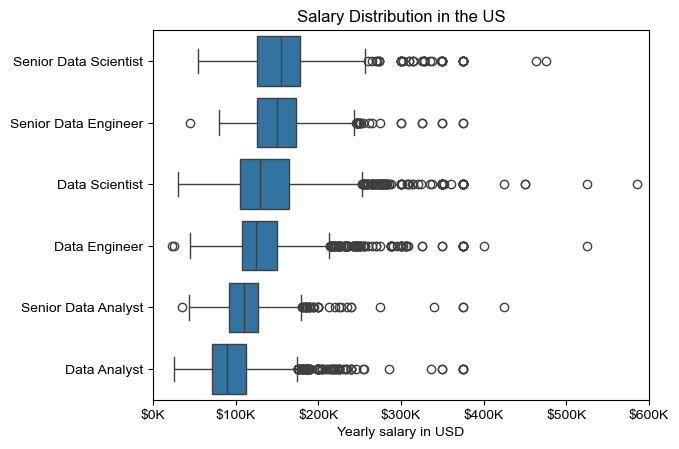

In [6]:
# using sns boxplot to plot the data

sns.boxplot(data = df_us_top6, x = 'salary_year_avg', y = 'job_title_short', order = job_order)
sns.set_theme(style = 'ticks')
plt.title('Salary Distribution in the US')
plt.xlabel('Yearly salary in USD')
plt.ylabel('')
plt.xlim(0,60000)

# setting x-axis in desired format
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))
plt.xlim(0,600000)
plt.show()

In [7]:
df_da_us = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()

df_da_us = df_da_us.dropna(subset = ['salary_year_avg'])

In [ ]:
df_da_us

In [9]:
df_da_us = df_da_us.explode('job_skills')

df_da_us[['salary_year_avg', 'job_skills']].head(5)

,salary_year_avg,job_skills
109,89000.0,python
109,89000.0,r
109,89000.0,alteryx
109,89000.0,tableau
180,90250.0,excel


In [11]:
df_da_top_salary = df_da_us.groupby('job_skills')['salary_year_avg'].agg(['count', 'median'])
df_da_top_salary.sort_values(by = 'median', ascending= False)

,count,median
job_skills,,
dplyr,2,196250.000000
bitbucket,3,189000.000000
gitlab,3,186000.000000
solidity,1,179000.000000
hugging face,1,175000.000000
...,...,...
smartsheet,18,61250.000000
npm,3,60000.000000
vb.net,5,60000.000000


In [12]:
df_da_top_salary = df_da_top_salary.head(10)

In [15]:
df_da_skills = df_da_us.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by= 'count', ascending= False)
df_da_skills = df_da_skills.head(10)

In [18]:
df_da_skills.sort_values(by = 'median', ascending = False)

,count,median
job_skills,,
python,1431,97500.00
tableau,1364,92875.00
r,893,92500.00
sql server,286,92500.00
sql,2508,91000.00
sas,926,90000.00
power bi,838,90000.00
powerpoint,462,85000.00
excel,1808,84392.00


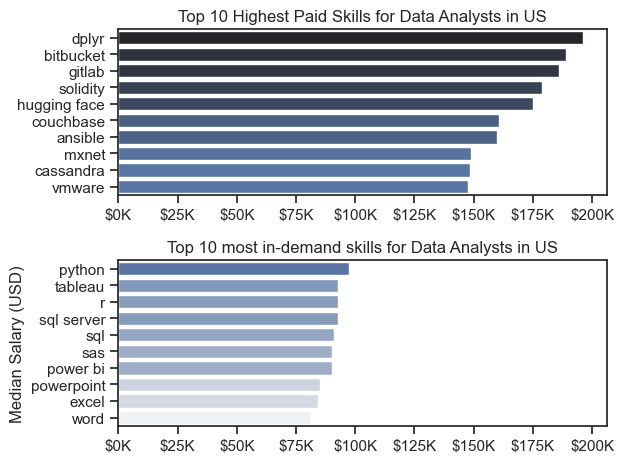

In [20]:
fig, ax = plt.subplots(2,1)

sns.set_theme(style='ticks')
# Top 10 Highest Paid Skills for Data Analysis
# using seaborn to plot our data, to put the colors on the bar first we need to define the hue which in this case is median then decide the color palette
# and with adding _r in the palette we can reverse the color oalette of the bars
sns.barplot(data = df_da_top_salary, x = 'median', y = df_da_top_salary.index, ax = ax[0], hue = 'median', palette = 'dark:b_r')

# df_da_top_salary.plot(kind = 'barh', y = 'median', ax = ax[0], legend = False)
# ax[0].invert_yaxis()
ax[0].legend().remove()
ax[0].set_title('Top 10 Highest Paid Skills for Data Analysts in US')
ax[0].set_xlabel('')
ax[0].set_ylabel('')
ax[1].set_xlim(ax[0].get_xlim())  # we can set the x limit of the 1 graph to the 2nd graph
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))

# Top 10 in-demand Skills for Data Analysis
# using seaborn to plot our data, to put the colors on the bar first we need to define the hue which in this case is median then decide the color palette

sns.barplot(data = df_da_skills , x = 'median', y = df_da_skills.index, ax = ax[1], hue = 'median', palette = 'light:b')

# df_da_skills.plot(kind = 'barh', y = 'median', ax = ax[1], legend = False)
# ax[1].invert_yaxis()
ax[1].legend().remove()
ax[1].set_title('Top 10 most in-demand skills for Data Analysts in US')
ax[1].set_xlabel('')
ax[1].set_ylabel('Median Salary (USD)')
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))

plt.tight_layout()
plt.show()